In [50]:
import numpy as np
import matplotlib.pyplot as plt

# def metro(robots,grid,visibleSet):
#     n = len(robots)
#     comms = np.zeros((n,n)) #creating a matrix to see the communication between robots. 1 = can communicate, 0 = cannot communicate

#     for i in range(n): # build the communication matrix for n robots
#         for j in range(i+1,n):
#             r1,c1= robots[i]
#             r2,c2 = robots[j]
#             if los(r1,c1,r2,c2,grid):
#                 comms[i,j] = 1
#                 comms[j,i] = 1

#     degrees = []
#     for i in range(n): # get the degrees for n robots from the communication matrix
#         degree = np.sum(comms[i])
#         degrees.append(degree)

#     weights = np.zeros((n,n))
#     for i in range(n):
#         selfWeight = 1
#         totalWeight = 0
#         for j in range(n):
#             if (comms[i,j] == 1) & (i != j):
#                 w = 1/(1+max(degrees[i],degrees[j]))
#                 weights[i,j] = w
#                 totalWeight += w

#         weights[i,i] = selfWeight - totalWeight
#     return weights


def metro(robots): #function from homework 1 +  the node connections instead of two nodes
    N = len(robots)
    comms = np.zeros((N, N))
    
    #Node connection
    for i in range(N):
        neighbors = [(i-1) % N, (i+1) % N]  # Big circle and connects to two neighbors
        #print(neighbors)
        for j in neighbors:
            comms[i, j] = 1
            comms[j, i] = 1
    
    degrees = [] # the rest is just from the old homework assignement. Classic metropolis weights
    for i in range(N):
        degree = np.sum(comms[i])
        degrees.append(degree)
    
    weights = np.zeros((N, N))
    for i in range(N):
        selfWeight = 1
        totalWeight = 0
        for j in range(N):
            if (comms[i, j] == 1) & (i != j):
                w = 1 / (1 + max(degrees[i], degrees[j]))
                weights[i, j] = w
                totalWeight += w
        
        weights[i, i] = selfWeight - totalWeight
    
    return weights

In [51]:
def circ(N=10):# default to 10 robots
    # init robot positions
    robots = []
    for i in range(N):
        robots.append([i, 0])  

    metroWeights = metro(robots)
    #print("metro weights:")
    #print(metroWeights)
    rad = 100

    # robot random poisitions
    p_i = np.random.uniform(-5,5, (N,2)) #random positions x and y between -5 and 5 for N robots (has floats)
    #print(f"robot positions: {p_i}")
    circPositions = np.linspace(0, 2*np.pi, N) #equatlly spaced positons in a circle
    r_i = np.zeros((N, 2))
    r_i[:, 0] = rad * np.cos(circPositions) #circular positions (x)
    r_i[:, 1] = rad * np.sin(circPositions) #circular positions (y)

    # optimal position (found in problem 1.1) // axis=0 is the mean for 2D arrays
    optPos = np.mean(p_i - r_i,axis=0)
    return optPos, p_i, r_i, metroWeights


In [52]:
def simConstant(alpha, optPos, p_i, r_i, W, N=10, iter=100): # default to 10 robots, 100 steps default
    #xcurr = np.zeros((N, 2))
    xcurr = np.random.uniform(-5,5,(N, 2)) #random estimate instead of no initial guesses
    xvals = [xcurr]
    errors = []

    # descent grad update
    for k in range(iter):
        xnew = np.zeros((N, 2)) # very costly to do this with 3 for loops, but this is straightforward. Could probably be done with two somehow
        for i in range(N):
            conVal = np.zeros(2) # init for each robot
            for j in range(N):
                conVal += W[i, j] * xcurr[j] #consensus step
                
            # gradient
            grad = xcurr[i] + r_i[i] - p_i[i]
                
            # update
            xnew[i] = conVal - alpha * grad
        
        xcurr = xnew
        xvals.append(xcurr)
        # disagreement term
        localEstiamte = np.mean(xcurr,axis=0) # 2D array mean (axis=0)
        error = np.linalg.norm(localEstiamte - optPos)
        errors.append(error)
    
    return errors, xcurr,xvals

In [53]:
def simVariable(optPos, p_i, r_i, W, N=10, iter=100): # default to 10 robots, 100 steps default
    #xcurr = np.zeros((N, 2))
    xcurr = np.random.uniform(-5,5,(N, 2)) #random estimate instead of no initial guesses
    xvals = [xcurr]
    errors = []
    

    # descent grad update
    for k in range(iter):
        alpha = 1 / (1 + k)
        xnew = np.zeros((N, 2))
        for i in range(N):
            conVal = np.zeros(2)
            for j in range(N):
                conVal += W[i, j] * xcurr[j] #consensus step
                
            # gradient
            grad = xcurr[i] + r_i[i] - p_i[i]
                
            # update
            xnew[i] = conVal - alpha * grad
        
        xcurr = xnew
        xcurr = xnew
        xvals.append(xcurr)
        
        # disagreement term
        localEstiamte = np.mean(xcurr,axis=0) # 2D array mean (axis=0)
        error = np.linalg.norm(localEstiamte - optPos)
        errors.append(error)
        
    return errors, xcurr, xvals

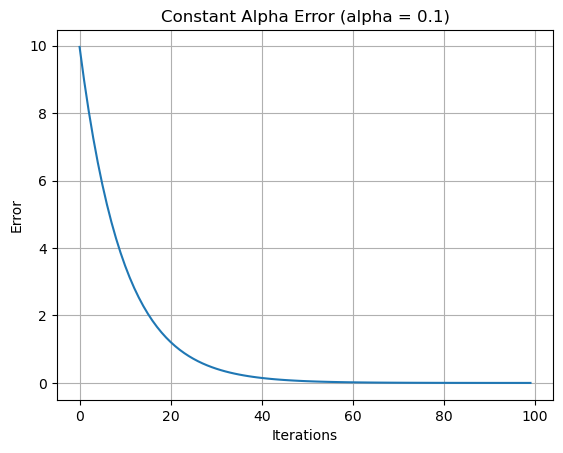

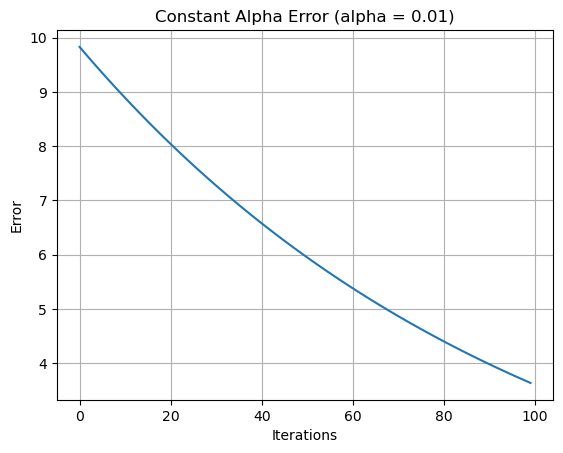

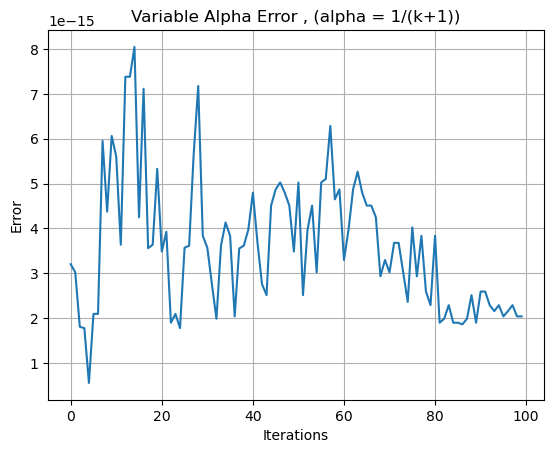

In [54]:
#init param
N = 10
iter = 100


optPos, p_i, r_i, W = circ(N) # all simulations ahve the same initial conditions/parameters
alpha = 0.1 #alpha 1

errorsC, finalPosC, xvals1 = simConstant(alpha, optPos, p_i, r_i, W, N, iter) #constant alpha = 0.1
plt.figure(1)
plt.plot(errorsC)
plt.title(f"Constant Alpha Error (alpha = {alpha})")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.grid(True)
plt.show()

alpha = 0.01 #alpha 2
errorsC, finalPosC,xvals2 = simConstant(alpha, optPos, p_i, r_i, W, N, iter)#constant alpha = 0.01
plt.figure(2)
plt.plot(errorsC)
plt.title(f"Constant Alpha Error (alpha = {alpha})")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.grid(True)
plt.show()

#variable alpha
errorsV, finalPosV, xvals3 = simVariable(optPos, p_i, r_i, W, N, iter) #vraiable alphs
plt.figure(3)
plt.plot(errorsV)
plt.title("Variable Alpha Error , (alpha = 1/(k+1))")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.grid(True)
plt.show()


#print(f"Error for Constant alpha: {errorsC}")
#print(f"Error for Variable alpha: {errorsV}")

In [55]:
# positions over time
def plotPos(xValues):
    plt.figure(figsize=(10, 10))
    xArray = np.array(xValues) 
    #print(xArray)

    # plot trajectory for each robot in the system
    for i in range(N):
        plt.plot(xArray[:, i, 0], xArray[:, i, 1], label=f"Robot {i+1}")


    for i in range(N):
        plt.scatter(xArray[0, i, 0], xArray[0, i, 1], color='black', marker='s') # plot the start positions for each robot

        plt.scatter(xArray[-1, i, 0], xArray[-1, i, 1],color='blue', marker='o') # plot the end positions for each robot 

    plt.scatter(optPos[0], optPos[1], c='red', marker='v', label="Formation Center", s = 100) # plot the optimal position/center of the formation
    plt.title(f"Estimates and Goal Positions Over Time with {iter} Iterations")
    plt.xlabel("X val")
    plt.ylabel("Y val")
    plt.legend()
    plt.grid(True)

    plt.show()

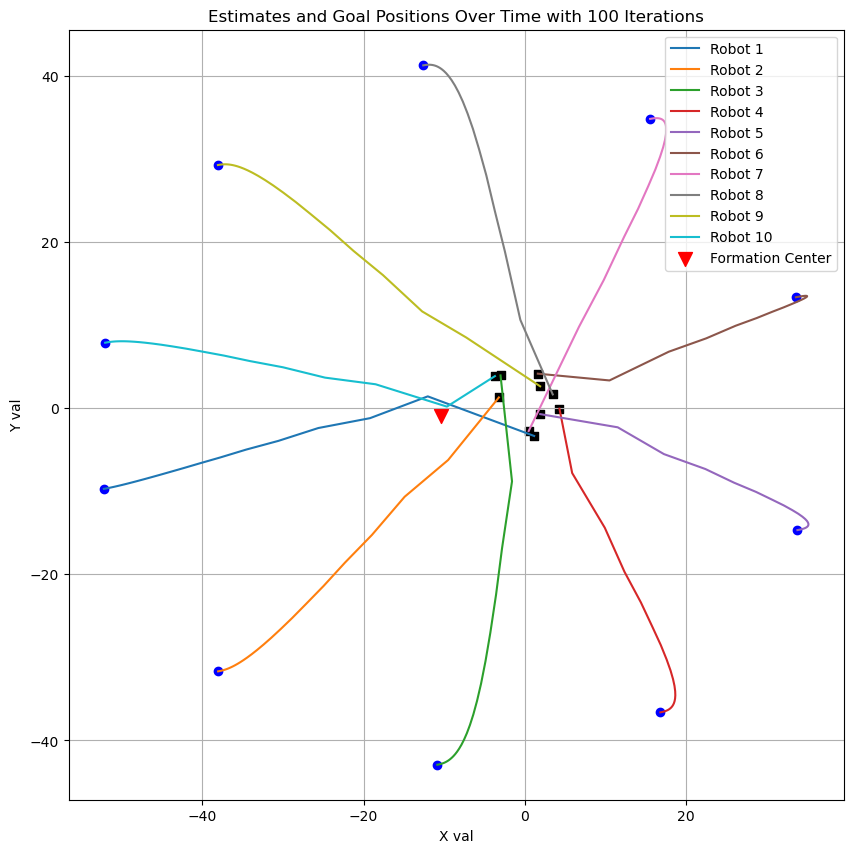

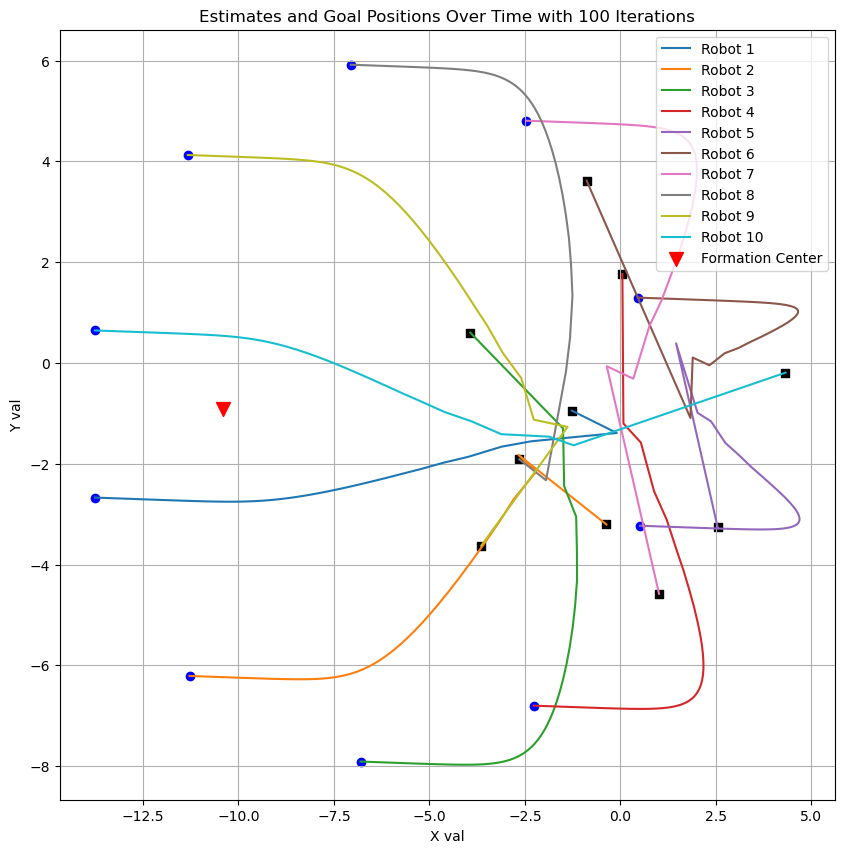

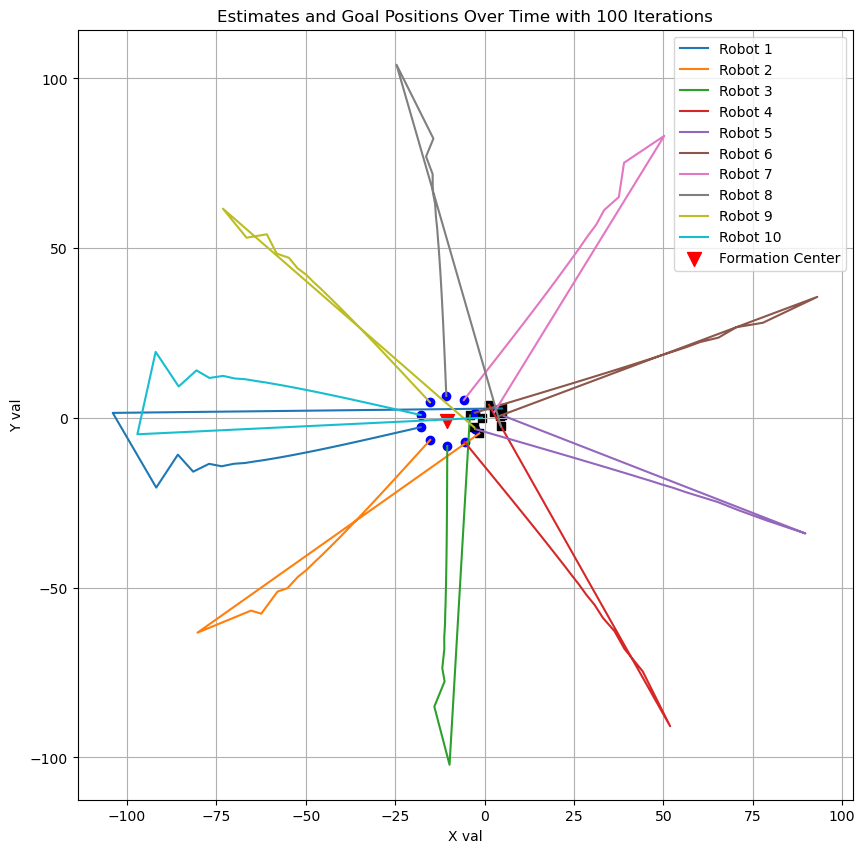

In [56]:
plotPos(xvals1) #constant alpha = 0.1
plotPos(xvals2) #constant alpha = 0.01
plotPos(xvals3) #variable alpha = 1/(k+1)